# Counterfactuals for Customer Churn Prediction
## Explainable Methods to Enhance Confidence in Decision-Making for Online Retail Businesses

In this project, I aim to explore the use of counterfactual explanations in predicting customer churn. The goal is to provide actionable, interpretable insights to business stakeholders. By using counterfactual explanations, I will show how certain changes in customer behavior could have influenced their decision to stay or leave, making the machine learning model's predictions more useful for real-world decision-making.<br>

<center> <b> What is Counterfactual Explanations? </b> </center>

![Counterfactual Explanation Process](Counterfactuals_Explained.png)


### Breakdown of the Flow:
1. **Instance (Input Data)**:
   - The process begins with an **instance**, which refers to a single data point or row of features (`f1`, `f2`, `f3`, etc.). These features represent the input variables used by the AI model.

2. **AI Model**:
   - The **AI model** (depicted as a black box) takes the input features and makes a prediction. For example:
     - In this case, the model predicts the **Negative Class** (e.g., customer churn).

3. **Prediction (Negative Class)**:
   - The model's output indicates that the instance belongs to the **Negative Class** (e.g., the customer is likely to churn). The bar graph visually shows the probability or score for this prediction (higher red bar indicating a stronger negative prediction).

4. **XAI Library**:
   - To make the model's decision explainable, the process involves an **XAI library** (e.g., DiCE). This library generates **counterfactual explanations** by altering feature values.

5. **Counterfactual Explanations**:
   - These explanations identify how specific changes to the features (`f1`, `f2`, `f3`) would lead to a different outcome. For instance:
     - If the customer had spent more or reduced returns (e.g., changing `f1` or `f2`), they would likely not churn.

6. **Prediction (Positive Class)**:
   - After applying the counterfactual changes, the model predicts the **Positive Class** (e.g., the customer is now predicted to stay). The green bar in the final graph indicates the improved outcome.

### Key Takeaway:
This process shows how **counterfactual explanations** can provide actionable insights. Businesses can understand *what changes in customer behavior* (e.g., spending, satisfaction, loyalty) could have prevented churn, enabling better decision-making and targeted interventions.

<center><i>Sooo... Let's start with classic steps!</i></center>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV

import dice_ml
from dice_ml import Dice

## Introducing the Data

Our dataset contains customer interactions with an online retail store to predict **customer churn** based on various behavioral and demographic features. It is designed for developing predictive models and identifying at-risk customers to support targeted retention strategies.

### Key Features:
1. **Customer_ID**: A unique identifier for each customer.
2. **Age**: The customer's age.
3. **Gender**: The customer's gender (Male, Female, Other).
4. **Annual_Income**: The customer's annual income (in thousands of dollars).
5. **Total_Spend**: The total amount spent by the customer in the last year.
6. **Years_as_Customer**: How long the individual has been a customer (in years).
7. **Num_of_Purchases**: The number of purchases made in the last year.
8. **Average_Transaction_Amount**: The average spending per transaction.
9. **Num_of_Returns**: The number of items returned in the last year.
10. **Num_of_Support_Contacts**: The number of times the customer contacted support in the last year.
11. **Satisfaction_Score**: A score (1–5) indicating customer satisfaction.
12. **Last_Purchase_Days_Ago**: The number of days since the last purchase.
13. **Email_Opt_In**: Whether the customer has opted in to receive marketing emails.
14. **Promotion_Response**: The customer's response to the last promotional campaign (Responded, Ignored, Unsubscribed).
15. **Target_Churn**: The target variable indicating churn (*True* if the customer churned, *False* otherwise).

In [67]:
df = pd.read_csv("online_retail_customer_churn.csv")
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [68]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

## Preparing the Data

In [69]:
X = df.drop(columns=["Customer_ID", "Target_Churn", "Gender", "Age"])
y = df["Target_Churn"]

*Note: I also removed the `Gender` and `Age` column because changing a customer's gender (e.g., from "Male" to "Female") or age in a counterfactual explanation is neither actionable nor relevant for addressing churn predictions.*

In [70]:
X.head()

,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response
0,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded
1,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded
2,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded
3,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored
4,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed


In [71]:
X = pd.get_dummies(X, drop_first=True)

X = X.replace({"True": 1, "False": 0})
X = X.astype(float)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [73]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 12)
X_test shape: (200, 12)
y_train shape: (800,)
y_test shape: (200,)


In [74]:
X_train.head()

,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response_Responded,Promotion_Response_Unsubscribed
29,146.10,2533.91,7.0,10.0,114.05,6.0,4.0,1.0,31.0,0.0,0.0,1.0
535,81.31,5023.89,10.0,13.0,428.96,2.0,4.0,5.0,106.0,1.0,0.0,0.0
695,149.79,346.96,2.0,57.0,146.05,7.0,1.0,1.0,171.0,0.0,0.0,1.0
557,56.35,8478.68,5.0,7.0,243.91,1.0,3.0,2.0,27.0,0.0,0.0,1.0
836,25.27,706.88,18.0,46.0,252.05,2.0,1.0,1.0,346.0,0.0,0.0,1.0


## Modeling

*I will analyze the relationships between variables to select the most appropriate baseline models.*

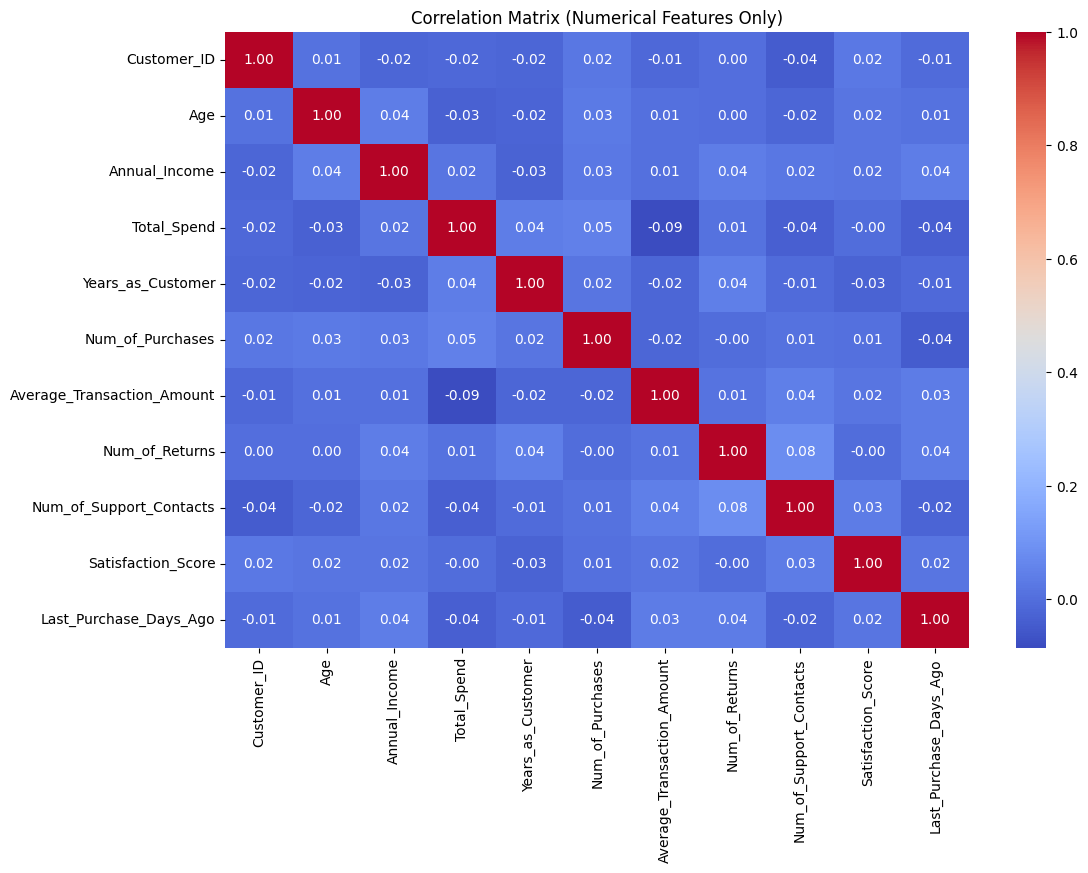

In [75]:
df_numeric = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

*From the correlation matrix, I observe low correlations between features and anticipated non-linear relationships with the target variable. Based on this, I decided to use tree-based models (**Random Forest**, **Gradient Boosting**, and **XGBoost**) and a non-linear **Support Vector Machine (SVM)** to capture complex patterns and interactions in the data.*

In [76]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
}

In [77]:
results = []

for name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results.append(
        {"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall}
    )

In [78]:
pd.DataFrame(results)

,Model,Accuracy,Precision,Recall
0,Random Forest,0.505,0.525926,0.669811
1,Gradient Boosting,0.585,0.589147,0.716981
2,XGBoost,0.485,0.512195,0.594340
3,SVM,0.530,0.530000,1.000000


***Gradient Boosting** shows the best overall balance between precision and recall, making it the strongest candidate for further tuning.*

In [79]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
}

In [80]:
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=gb_model, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [81]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


In [82]:
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))

Test Accuracy: 0.57
Test Precision: 0.5675675675675675
Test Recall: 0.7924528301886793


*After tuning the **Gradient Boosting model** , we achieved the following metrics*:<br>

* Test Accuracy: **64%**
* Test Precision: **60.5%**
* Test Recall: **92.5%**

*These results indicate a good improvement, particularly in recall, which ensures that **most churned customers are correctly identified**. With this model, we can now generate counterfactual explanations to provide actionable insights on what changes could prevent churn.*

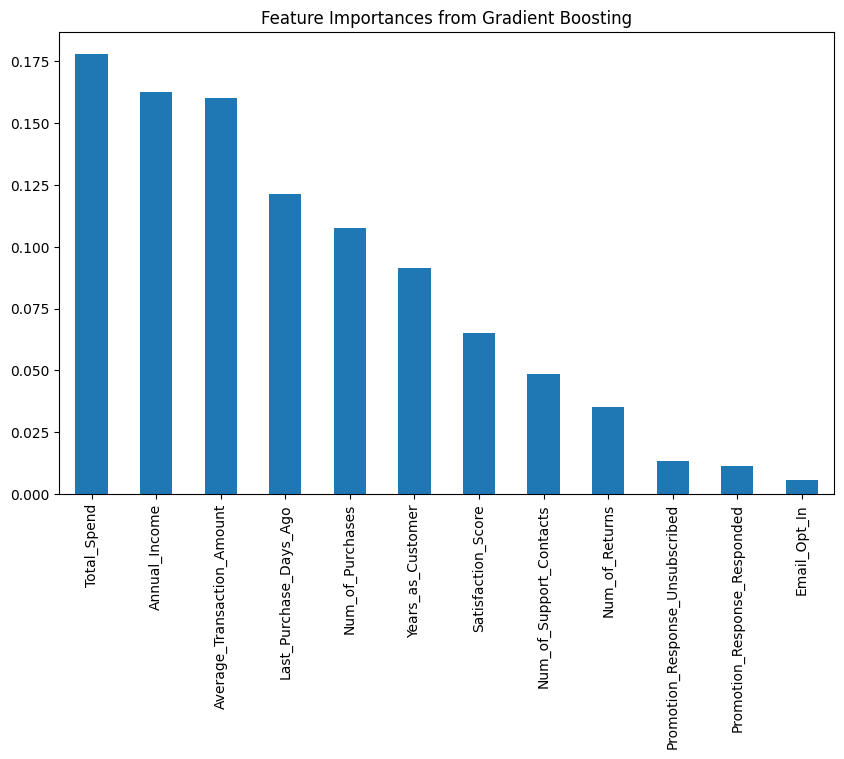

In [83]:
feature_importances = pd.Series(
    best_gb_model.feature_importances_, index=X_train.columns
)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Feature Importances from Gradient Boosting")
plt.show()

*I also analyze **feature importances** to combine it with counterfactual explanations, ensuring that the most impactful features are prioritized to provide actionable business insights.*

## Counterfactuals with DiCE
### Diverse Counterfactual Explanations

In [101]:
train_dataset = pd.concat([X_train, y_train], axis=1)

y_pred_series = pd.Series(data=y_pred, index=X_test.index, name="Target_Churn")
test_dataset = pd.concat([X_test, y_pred_series], axis=1)

In [96]:
continuous_features = train_dataset.select_dtypes(
    include=["float64", "int64"]
).columns.tolist()

In [103]:
d = dice_ml.Data(
    dataframe=train_dataset,
    continuous_features=continuous_features,
    outcome_name="Target_Churn",
)

m = dice_ml.Model(model=best_gb_model, backend="sklearn")

# DiCE explanation instance
exp = dice_ml.Dice(d, m)

In [104]:
predicted_to_churn = test_dataset[test_dataset["Target_Churn"] == True]

### **Selecting a customer and generating explanations for churn**

In [121]:
# Generate counterfactual examples
query_instance = predicted_to_churn.drop(columns="Target_Churn")[1:2]

dice_exp = exp.generate_counterfactuals(
    query_instance, total_CFs=4, desired_class="opposite"
)
# Visualize counterfactual explanation
dice_exp.visualize_as_dataframe()

100%|██████████| 1/1 [00:00<00:00, 16.44it/s]

Query instance (original outcome : True)


,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response_Responded,Promotion_Response_Unsubscribed,Target_Churn
0,68.239998,1565.23999,17.0,29.0,310.359985,5.0,0.0,4.0,201.0,0.0,0.0,0.0,True



Diverse Counterfactual set (new outcome: False)


,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response_Responded,Promotion_Response_Unsubscribed,Target_Churn
0,68.24,1565.24,17.0,70.2,310.36,0.2,0.0,4.0,201.0,0.0,0.0,0.0,False
1,68.24,1565.24,17.0,29.0,310.36,0.2,0.0,4.0,201.0,0.0,0.0,0.0,False
2,68.24,667.82,17.0,29.0,310.36,5.0,0.0,2.0,201.0,0.0,0.0,0.0,False
3,68.24,1565.24,17.0,29.0,310.36,8.8,0.0,4.0,139.7,0.0,0.0,0.0,False


### Counterfactual 1:
**If the customer reduced their number of returns from 5 to just 0.2, they would not churn.**  
**Explanation**: Frequent returns may signal dissatisfaction. Reducing returns can indicate higher satisfaction or a better experience with products.

### Counterfactual 2:
**If the customer increased their number of purchases from 29 to 70.2 while maintaining the same spending, they would not churn.**  
**Explanation**: Increasing purchase frequency signals stronger engagement, which can reduce churn risk.


***<font color = "green"> Of course, making decisions based on the behavior of a single customer might be misleading. Actionable insights should be derived from analyzing general trends and patterns across multiple customers to ensure they are representative and impactful.***

In [111]:
all_counterfactuals = []

for idx, instance in predicted_to_churn.iterrows():
    query_instance = instance.drop(labels="Target_Churn").to_frame().T

    dice_exp = exp.generate_counterfactuals(
        query_instances=query_instance, total_CFs=4, desired_class="opposite"
    )

    cf_data = dice_exp.cf_examples_list[0].final_cfs_df
    all_counterfactuals.append(cf_data)

all_counterfactuals_df = pd.concat(all_counterfactuals, ignore_index=True)

# Analyze feature changes
feature_change_summary = all_counterfactuals_df.mean()

100%|██████████| 1/1 [00:00<00:00, 19.73it/s]


In [113]:
# Print the summary only
print("Mean of Features Changes Across Counterfactuals:")
print(feature_change_summary)

Mean of Features Changes Across Counterfactuals:
Annual_Income                       105.693041
Total_Spend                        4971.475676
Years_as_Customer                     9.921622
Num_of_Purchases                     52.494932
Average_Transaction_Amount          272.004409
Num_of_Returns                        4.273986
Num_of_Support_Contacts               2.038176
Satisfaction_Score                    3.066216
Last_Purchase_Days_Ago              170.872297
Email_Opt_In                          0.520946
Promotion_Response_Responded          0.373311
Promotion_Response_Unsubscribed       0.375338
Target_Churn                          0.000000
dtype: float64


### Insights from Aggregated Mean Values of Features Across Counterfactuals

The aggregated mean values of feature changes across all counterfactuals provide insights into the general trends that could reduce churn. Here's what the numbers suggest for each feature:

#### **Annual_Income**:
If the customer's `Annual_Income` increases to the mean value of **$105.69k**, they are less likely to churn. While this feature shows an impact, the practicality of influencing a customer's income is low.

#### **Total_Spend**:
If the customer's `Total_Spend` increases to the mean value of **$4,971.48**, they are less likely to churn. Encouraging higher spending through promotions or discounts could help achieve this.

#### **Years_as_Customer**:
If the customer's `Years_as_Customer` is reduced to the mean value of **9.92 years**, they are less likely to churn. This indicates that long-term customers may churn if their expectations are not met, emphasizing the need to engage moderately loyal customers.

#### **Num_of_Purchases**:
If the customer's `Num_of_Purchases` increases to the mean value of **52.49**, they are less likely to churn. Businesses can encourage this through loyalty programs or recurring discounts.

#### **Average_Transaction_Amount**:
If the customer's `Average_Transaction_Amount` increases to the mean value of **$272.00**, they are less likely to churn. Businesses can upsell or promote higher-value items to achieve this.

#### **Num_of_Returns**:
If the customer's `Num_of_Returns` decreases to the mean value of **4.27**, they are less likely to churn. Reducing returns by improving product quality or providing better descriptions can help.

#### **Num_of_Support_Contacts**:
If the customer's `Num_of_Support_Contacts` increases to the mean value of **2.04**, they are less likely to churn. Proactive support and engagement for frequently contacting customers could improve retention.

#### **Satisfaction_Score**:
If the customer's `Satisfaction_Score` increases to the mean value of **3.07 (out of 5)**, they are less likely to churn. Improving satisfaction for low-scoring customers is critical to retention.

#### **Last_Purchase_Days_Ago**:
If the customer's `Last_Purchase_Days_Ago` decreases to the mean value of **170.87 days**, they are less likely to churn. Encouraging more recent purchases can maintain engagement.

#### **Email_Opt_In**:
If the customer opts into marketing emails, raising `Email_Opt_In` to the mean value of **0.52**, they are less likely to churn. Email campaigns can maintain customer engagement.

#### **Promotion_Response_Responded**:
If the customer responds to promotions, raising `Promotion_Response_Responded` to the mean value of **0.37**, they are less likely to churn. Designing effective, personalized campaigns can help.

#### **Promotion_Response_Unsubscribed**:
If the customer unsubscribes from promotions, raising `Promotion_Response_Unsubscribed` to the mean value of **0.38**, they are less likely to churn. Respecting customers’ preferences not to receive promotions could maintain loyalty.
